<i>Status: Draft</i>


In [23]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import pandas as pd
import node2vec as n2v
import karateclub as kc
import random
import stellargraph as sp
from IPython.display import Image
from gem.embedding.gf import GraphFactorization
from pathlib import Path
Path("gem/intermediate").mkdir(parents=True, exist_ok=True)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<hr/>

<b>Aim</b>: Provide definitions of standard metrics

<hr/>



<b>Definition</b>: <b>Integration Metrics</b> measure the connections between nodes. These metrics include:  

1. <b>Definition</b>: The <b>Distance</b> between two nodes is the number of edges that can be traversed to move from one to node to the other node. Also called the <b>Path</b>
2. <b>Definition</b>: A <b>Shortest Path</b> is the minimum number of edges that can connect two nodes. 
3. <b>Definition</b>: The <b>Diameter</b> is then number of edges contained in the longest <b>Shortest Path</b>
4. <b>Definition</b>: The <b>Characteristic Path Length</b> is the average of all <b>Shortest Paths</b> within the graph. It can be calculated by using the formula $ \frac{1}{q(q - 1)} \Sigma_{i \in{V}} l_i  $, where $V$ is set of nodes and $q = |V|$
5. <b>Definition</b>: The <b>Global Efficiency</b> is the inverse of the <b>Shortest path</b> for all pairs of nodes, and is a measure of how efficiently information can be moved across a network. It is given by the formula $ \frac{1}{q(q - 1)} \Sigma_{i \in V} \frac{1}{l_{ij}}$
6. <b>Definition</b>: The <b>Local Effiency</b> is calculated in the same manner of <b>Global Efficiency</b>, but considers only the neighborhood of the node, not the node itself



<b>Definition</b>: <b>Segregation Metrics</b> measure the presence of groups of interconnected nodes (or communities) within a network. These metrics include:

7. <b>Definition</b>: The <b>Clustering Coefficient</b> measures how much nodes cluster together, defined as a fraction of triangles, which is the fraction of a node's neighbors that are neighbors of each other. These is also a local version of this metric called the <b>Local Clustering Coefficient</b> that considers each node in a network.
8. <b>Definition</b>: The <b>Transitivity</b> of a graph is the ratio between observed number of closed triplets (i.e. complete subgraphs with 3 nodes and 2 edges) and maximum possible closed triplets.
9. <b>Definition</b>: The <b>Modularity</b> of a network quantifies the dvision of a network into groups (which may be called modules, clusters, groups, sub-graphs) and measures which groups are more closed that others. 

<b>Definition</b>: <b>Centrality Metrics</b> assess the importance of individual nodes inside a given network. These metrics include: 

10. <b>Defintion</b> The <b>Degree centrality</b> measures the number of incident edges on a given node $i$. This can be further defined by <b>in-degree centrality</b> and <b>out-degree centrality</b> referring to the direction of the edges 
11. <b>Definition</b>: The <b>Closeness Centrality</b> quantifies how much a node is connected to other nodes. It is the average of distance of node $i$ to all other nodes. If $l_{ij}$ is the shortest path between $i$ and $j$, closeness centrality is defined as: $ \frac{1}{\Sigma_{i \in V, i\ne j} l{ij}}$
12. <b>Definition</b>: The <b>Betweeness Centrality</b> metric evaluates how much a node acts as a bridge between nodes, given by the formula $ \Sigma_{w \ne i i \ne j} \frac{L_{wj}(i)}{L_{wj}} $ where $L_{wj}$ is total number of shortest paths between node $w$ and node $j$ and $L_{wj}(i)$ is the total number of paths between $w$ and $j$ passing through $i$



<b>Definiton</b>: <b>Resiliance Metrics</b> measure how much a network can maintain and adapt its operational performance when facing failure. These metrics include:

13. <b>Definition</b>: The <b>Assortativity</b> quantifies the tendency of nodes being connected to similiar nodes and there are different measures that are used to calculate this. 
14. <b>Definition</b>: The <b>Pearson Correlation Coefficient</b> measures the <b>assortativity</b> between degrees of directly connected nodes. It assumes postive values when there is a correlation between nodes of a similiar degree

<hr/>

<b>Aim</b>: Demonstrate <b>Integration Metrics</b> using networkx

<hr/>

<b>Let</b> $P1$ be a graph.

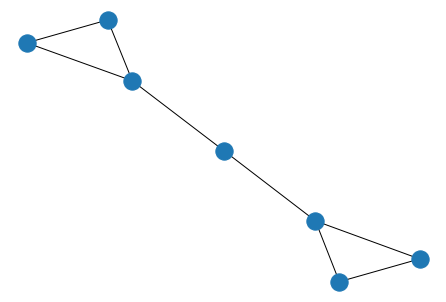

In [24]:
P1 = nx.Graph()
nodes = {1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7'}
P1.add_nodes_from(nodes.keys())
P1.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])
nx.draw(P1)

<b>Let</b> $P2$ and $P3$ be shortest paths between nodes in $P1$.

In [25]:
print(nx.shortest_path(P1,source=1,target=7))
print(nx.shortest_path(P1, source = 1, target=4))

[1, 3, 4, 5, 7]
[1, 3, 4]


<b>Let</b> $P4$ be the average shortest path length in $P1$.

In [26]:
P4 = nx.average_shortest_path_length(G)
P4

2.1904761904761907

<b>Let</b> $P5$ and $P6$ be the global efficiency and local efficiency of $P1$.

In [27]:
P5 = nx.global_efficiency(P1)
P6 = nx.local_efficiency(P1)
P5, P6

(0.611111111111111, 0.6666666666666667)

<b>Let</b> $P7$ be a graph will all nodes connected to eachother.

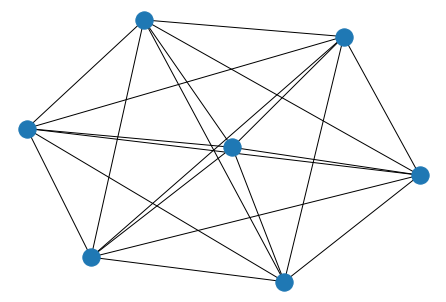

In [28]:
P7 = nx.complete_graph(n=7)
nx.draw(P7)



<b>Let</b> $P8$ and $P9$ be the global efficiency and local efficiency of $P7$.

In [29]:
P8 = nx.global_efficiency(P7)
P9 = nx.local_efficiency(P7)
P8, P9

(1.0, 1.0)

<b>Observe</b>: $P7$ is more efficient as information that can be moved from any node to any other node through a single edge.

<hr/>

<b>Aim</b>: Demonstrate <b>Segregation Metrics</b> using networkx

<hr/>

<b>Let</b> $P10$ and $P11$ be the clustering coefficients for $P1$ and $P7$.

In [30]:
P10 = nx.average_clustering(P1)
P11 = nx.average_clustering(P7)
P10, P11

(0.6666666666666667, 1.0)

<b>Let</b> $P12$ and $P13$ be the local clustering coefficients for $P1$ and $P7$.

In [31]:
P12 = nx.clustering(P1)
P13 = nx.clustering(P7)
P12, P13

({1: 1.0,
  2: 1.0,
  3: 0.3333333333333333,
  4: 0,
  5: 0.3333333333333333,
  6: 1.0,
  7: 1.0},
 {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0})

<b>Let</b> $P14$ and $P15$ be the Transitivity of $P1$ and $P7$.

In [32]:
P14 = nx.transitivity(P1)
P15 = nx.transitivity(P7)
P14, P15

(0.5454545454545454, 1.0)

<b>Let</b> $P16$ be the Modularity of the graph $P1$.

In [33]:
P16 = nx_comm.modularity(P1, communities=[{1,2,3}, {4, 5, 6, 7}])
P16

0.3671875

<hr/>

<b>Aim</b>: Demonstrate <b>Centrality Metrics</b> using networkx

<hr/>

<b>Let</b> $P17$ adn $P18$ be the degree centrality for graphs $P1$ and $P7$.

In [34]:
P17 = nx.degree_centrality(P1)
P18 = nx.degree_centrality(P7)
P17, P18

({1: 0.3333333333333333,
  2: 0.3333333333333333,
  3: 0.5,
  4: 0.3333333333333333,
  5: 0.5,
  6: 0.3333333333333333,
  7: 0.3333333333333333},
 {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0})

<b>Let</b> $P19$ adn $P20$ be the closeness centrality for graphs $P1$ and $P7$.

In [35]:
P19 = nx.closeness_centrality(P1)
P20 = nx.closeness_centrality(P7)
P19, P20

({1: 0.4,
  2: 0.4,
  3: 0.5454545454545454,
  4: 0.6,
  5: 0.5454545454545454,
  6: 0.4,
  7: 0.4},
 {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0})

<b>Let</b> $P21$ adn $P22$ be the betweenness centrality for graphs $P1$ and $P7$.

In [37]:
P21 = nx.betweenness_centrality(P1)
P22 = nx.betweenness_centrality(P7)
P21, P22

({1: 0.0,
  2: 0.0,
  3: 0.5333333333333333,
  4: 0.6,
  5: 0.5333333333333333,
  6: 0.0,
  7: 0.0},
 {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0})

<hr/>

<b>Aim</b>: Demonstrate <b>Resilience Metrics</b> using networkx

<hr/>

<b>Let</b> $P23$ adn $P24$ be the assortativity (using the Pearson Correlation Coefficient) for graphs $P1$ and $P7$.

In [40]:
P23 = nx.degree_pearson_correlation_coefficient(P1)
P24 = nx.degree_pearson_correlation_coefficient(P7)
P23, P24

(-0.6, nan)

<b>Observe</b>: The Pearson Correlation Coeffient cannot be defined for $P7$ as all nodes are linked.